In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 결측치 대체 알고리즘

## 0) DataFrame.fillna() 활용
* DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)

## 1) SimpleImputer
* 한 특성의 통계 값을 사용하여 결측치를 대체
* 주요 parameter
    * missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
    * strategy : str {'mean', 'medain', 'most_frequent', 'constant'} default=’mean’
    * fill_value : str or numerical value, default=None
        * strategy = 'constant'인 경우 지정
    * copybool, default=True

In [19]:
from sklearn.impute import SimpleImputer

df=pd.DataFrame(np.random.randn(10,8),columns=list('01234567'))

indices=[[1,2],[1,6],[1,7],[4,5],[4,6],[5,6],[7,2],[8,4],[9,4]]

for index in indices:
    df.iloc[index[0],index[1]]=np.nan

df

,0,1,2,3,4,5,6,7
0,-0.964478,-0.412793,-0.195018,-0.437154,-1.439293,-1.024859,0.024905,-1.086548
1,-0.263193,3.013644,NaN,1.135124,0.552525,-0.892482,NaN,NaN
2,-1.502304,1.592672,-1.053233,1.359492,-1.039409,-0.283527,-1.493190,0.896846
3,0.641823,0.424332,1.200857,-0.063751,0.646307,0.241003,-0.467065,-0.103799
4,0.098186,-0.014878,0.671624,-0.016995,1.547635,NaN,NaN,0.357545
5,0.148819,0.893127,0.954442,1.856070,0.089306,0.046475,NaN,-0.082399
6,-1.683501,0.303084,-0.614764,0.890308,0.464647,-0.128210,0.229887,0.113988
7,-0.509417,0.824743,NaN,-0.286490,0.177695,-0.492696,0.312690,0.413537
8,0.229380,0.701217,0.978712,-0.666432,NaN,-0.288417,0.910135,-1.204569
9,-1.883488,0.937609,-0.522370,1.846389,NaN,0.105890,0.614845,1.043979


In [20]:
df_tmp=df
imputer = SimpleImputer(strategy='mean')
df_simple=imputer.fit_transform(df_tmp)
df_simple=pd.DataFrame(df_simple,columns=df.columns)
df_simple

,0,1,2,3,4,5,6,7
0,-0.964478,-0.412793,-0.195018,-0.437154,-1.439293,-1.024859,0.024905,-1.086548
1,-0.263193,3.013644,0.177531,1.135124,0.552525,-0.892482,0.018887,0.038731
2,-1.502304,1.592672,-1.053233,1.359492,-1.039409,-0.283527,-1.493190,0.896846
3,0.641823,0.424332,1.200857,-0.063751,0.646307,0.241003,-0.467065,-0.103799
4,0.098186,-0.014878,0.671624,-0.016995,1.547635,-0.301869,0.018887,0.357545
5,0.148819,0.893127,0.954442,1.856070,0.089306,0.046475,0.018887,-0.082399
6,-1.683501,0.303084,-0.614764,0.890308,0.464647,-0.128210,0.229887,0.113988
7,-0.509417,0.824743,0.177531,-0.286490,0.177695,-0.492696,0.312690,0.413537
8,0.229380,0.701217,0.978712,-0.666432,0.124927,-0.288417,0.910135,-1.204569
9,-1.883488,0.937609,-0.522370,1.846389,0.124927,0.105890,0.614845,1.043979


## 2) IterativeImputer
* 다른 특성을 통해 예측하여 결측치를 대체
* IterativeImputer(estimator=None, *, missing_values=nan, sample_posterior=False, max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='mean', imputation_order='ascending', skip_complete=False, min_value=-inf, max_value=inf, verbose=0, random_state=None, add_indicator=False)
* parameter 많음...^^
* **IterativeImputer 클래스는 아직 실험적이기 때문에 import enable_iterative_imputer 필요**

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

## 3) MICE(Multiple Imputation by Chained Equation)

In [38]:
# !pip install IPython 
from IPython.display import Image 

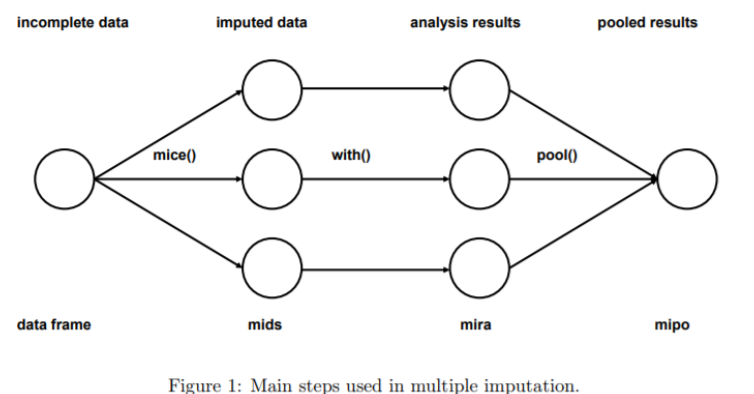

In [42]:
Image('./mice.PNG')
# 출처 : file:///C:/Users/User/Downloads/v45i03.pdf

* MICE는 연쇄 등식을 이용한 다중대치로, 과정은 아래와 같다
    * 1. 결측치를 다른 모든 변수를 사용하여 예측
    * 2. 모든 결측치를 채운 데이터 셋을 m(=3)개에 대해 with()를 사용하여 통계모형을 적용
    * 3. pool()을 사용하여 분석결과를 하나로 통합

In [33]:
# !pip install impyute

In [35]:
df

,0,1,2,3,4,5,6,7
0,-0.964478,-0.412793,-0.195018,-0.437154,-1.439293,-1.024859,0.024905,-1.086548
1,-0.263193,3.013644,NaN,1.135124,0.552525,-0.892482,NaN,NaN
2,-1.502304,1.592672,-1.053233,1.359492,-1.039409,-0.283527,-1.493190,0.896846
3,0.641823,0.424332,1.200857,-0.063751,0.646307,0.241003,-0.467065,-0.103799
4,0.098186,-0.014878,0.671624,-0.016995,1.547635,NaN,NaN,0.357545
5,0.148819,0.893127,0.954442,1.856070,0.089306,0.046475,NaN,-0.082399
6,-1.683501,0.303084,-0.614764,0.890308,0.464647,-0.128210,0.229887,0.113988
7,-0.509417,0.824743,NaN,-0.286490,0.177695,-0.492696,0.312690,0.413537
8,0.229380,0.701217,0.978712,-0.666432,NaN,-0.288417,0.910135,-1.204569
9,-1.883488,0.937609,-0.522370,1.846389,NaN,0.105890,0.614845,1.043979


In [34]:
from impyute.imputation.cs import mice

df_tmp=df
df_mice=mice(df_tmp.values)
df_mice=pd.DataFrame(df_mice)

df_mice

,0,1,2,3,4,5,6,7
0,-0.964478,-0.412793,-0.195018,-0.437154,-1.439293,-1.024859,0.024905,-1.086548
1,-0.263193,3.013644,-0.295666,1.135124,0.552525,-0.892482,0.211585,0.038731
2,-1.502304,1.592672,-1.053233,1.359492,-1.039409,-0.283527,-1.493190,0.896846
3,0.641823,0.424332,1.200857,-0.063751,0.646307,0.241003,-0.467065,-0.103799
4,0.098186,-0.014878,0.671624,-0.016995,1.547635,-0.301869,0.095536,0.357545
5,0.148819,0.893127,0.954442,1.856070,0.089306,0.046475,0.138636,-0.082399
6,-1.683501,0.303084,-0.614764,0.890308,0.464647,-0.128210,0.229887,0.113988
7,-0.509417,0.824743,0.167790,-0.286490,0.177695,-0.492696,0.312690,0.413537
8,0.229380,0.701217,0.978712,-0.666432,0.124927,-0.288417,0.910135,-1.204569
9,-1.883488,0.937609,-0.522370,1.846389,0.124927,0.105890,0.614845,1.043979


## 4) KNNImputer
* KNN을 활용하여 결측치를 처리하는 알고리즘
* parameters
    * missing_values : int, float, str, np.nan or None, default=np.nan
    * n_neighbors : int, default=5
    * weights : {‘uniform’, ‘distance’} or callable, default=’uniform’
    * metric : {‘nan_euclidean’} or callable, default=’nan_euclidean’
    * copy : bool, default=True

In [12]:
from sklearn.impute import KNNImputer

In [7]:
df=pd.DataFrame(np.random.randn(10,10),columns=list('0123456789'))

indices=[[1,2],[1,6],[1,7],[4,6],[5,6],[8,4],[7,2],[9,9]]

for index in indices:
    df.iloc[index[0],index[1]]=np.nan

df

,0,1,2,3,4,5,6,7,8,9
0,-1.179275,0.691948,-0.074631,0.311972,-0.370272,0.867332,-0.417858,-0.446086,-1.512698,-2.143118
1,1.930804,-0.025295,NaN,-1.177754,-0.493783,-1.179543,NaN,NaN,0.128612,0.042374
2,-1.325749,-0.616690,0.489336,-0.541776,0.297825,0.078340,1.529450,-0.358014,-0.799033,-1.730447
3,0.319100,-0.958018,-1.613798,-0.890176,-0.239658,-0.380948,0.631101,-0.043929,-1.991185,-0.612385
4,-0.087932,-0.740470,0.087685,-1.310122,-0.363420,0.065716,NaN,-1.415293,-0.795536,-0.384779
5,-0.177955,-0.815723,-0.962588,0.958709,0.741746,0.395671,NaN,-0.256826,-0.404251,-0.205445
6,-0.998483,-1.219795,0.417340,-0.215115,0.656536,0.766866,0.466150,1.919740,-0.313150,2.123322
7,0.652707,0.468698,NaN,0.463578,1.595926,-0.848258,0.301808,-1.624000,1.587022,-1.121330
8,0.301074,-1.376048,0.722790,1.498830,NaN,-1.662264,0.496408,-0.642227,-0.126333,1.092766
9,0.657944,-0.790997,0.171583,-0.388284,0.701549,-0.773167,1.562621,0.466051,-1.571420,NaN


In [8]:
df_tmp=df
imputer = KNNImputer(n_neighbors=4)
df_knn=imputer.fit_transform(df_tmp)
df_knn=pd.DataFrame(df_knn,columns=df.columns)
df_knn

,0,1,2,3,4,5,6,7,8,9
0,-1.179275,0.691948,-0.074631,0.311972,-0.370272,0.867332,-0.417858,-0.446086,-1.512698,-2.143118
1,1.930804,-0.025295,-0.579280,-1.177754,-0.493783,-1.179543,0.747985,-0.654293,0.128612,0.042374
2,-1.325749,-0.616690,0.489336,-0.541776,0.297825,0.078340,1.529450,-0.358014,-0.799033,-1.730447
3,0.319100,-0.958018,-1.613798,-0.890176,-0.239658,-0.380948,0.631101,-0.043929,-1.991185,-0.612385
4,-0.087932,-0.740470,0.087685,-1.310122,-0.363420,0.065716,0.826329,-1.415293,-0.795536,-0.384779
5,-0.177955,-0.815723,-0.962588,0.958709,0.741746,0.395671,0.826329,-0.256826,-0.404251,-0.205445
6,-0.998483,-1.219795,0.417340,-0.215115,0.656536,0.766866,0.466150,1.919740,-0.313150,2.123322
7,0.652707,0.468698,0.084306,0.463578,1.595926,-0.848258,0.301808,-1.624000,1.587022,-1.121330
8,0.301074,-1.376048,0.722790,1.498830,0.668951,-1.662264,0.496408,-0.642227,-0.126333,1.092766
9,0.657944,-0.790997,0.171583,-0.388284,0.701549,-0.773167,1.562621,0.466051,-1.571420,-0.733264


In [9]:
!pip install missingpy

## [5] MissForest
* Random Forest를 활용하여 결측치를 처리하는 알고리즘에서 
* KNN Imputer보다 성능이 우수함 

In [40]:
# !pip install missingpy
from missingpy import MissForest

imputer = MissForest()
df_missforest = imputer.fit_transform(X)
df_missforest=pd.DataFrame(df_missforest)
df_missforest

Iteration: 0
Iteration: 1
Iteration: 2


,0,1,2
0,4.84,2.0,3.00
1,4.84,1.0,5.58
2,4.00,1.0,6.00
3,4.84,1.0,5.58
4,10.00,1.0,9.00
5,4.84,1.0,5.58


# 2. 다양한 회귀모델

 * Linear Regression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor 외
 * 선형회귀 모델인 Lasso, Ridge, ElasticNet 
 * Boosting 기법을 활용한 모델인 AdaBoost / GBM(Gradient Boosting Machine) / XGBoost / LightGBM / CatBoost


In [7]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [31]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target']=boston.target

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [65]:
x=df.drop('target', axis=1)
y=df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## [0] 선형 회귀 분석의 4가지 가정
* 선형 회귀 분석은 아래 4가지 가정이 충족되어야 적절하다고 판단할 수 있다.

* 1) 선형성
    * 종속변수와 독립변수 간의 선형관계

* 2) 독립성
    * 독립 변수들 간의 통계적 독립성( 비 다중공선성 ) 

*  3) 등분산성
    * 잔차들의 분산이 일정

* 4) 정규성
    * 잔차들의 분포가 정규분포를 이룸

## [0] OLS

## [1] 선형 회귀 모델
* Lasso와 Ridge는 Linear Regression의 단점을 보완환 모델   

### 1) Lasso
*   

### 2) Ridge
*   

### 3)ElasticNet
*   


## [2]  Ensemble - Bagging(Bootstrap sample + Aggregating)

## [3]  Ensemble - Boosting
* 여러 개의 모델을 순차적으로 학습 및 예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가는 학습 방식

## [4] Ensemble - Stacking

## [5] Ensemble - Voting

# 3. 다양한 분류모델
* 회귀모델과 비슷 :)

# +. ETC

## [1] 모델 저장 

!pip install joblib   
joblib.dump( 'model' , '경로')

## [2] Pandas Profiling - EDA

In [100]:
# pip install pandas-profiling
# pip install markupsafe==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport

profile=ProfileReport(df, title='boston Report')

profile.to_file('boston Report.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\User\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]